In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


### Google Search Data - Keywords
Eco friendly, ocean plastic, plastic pollution 

In [77]:
ggl_ecofriendly = pd.read_csv("./data/ggl_ecofriendly.csv")
ggl_oceanplastic = pd.read_csv("./data/ggl_oceanplastic.csv")
ggl_plasticpollution = pd.read_csv("./data/ggl_plasticpollution.csv")
ggl_reusable = pd.read_csv("./data/ggl_reusable.csv")

### Google Search Data - Flasks (Popular reusable waterbottles)
Hydro Flask, Yeti, Camelbak, Contigo, S'well

In [72]:
ggl_hydroflask = pd.read_csv("./data/ggl_hydroflask.csv")
ggl_yeti = pd.read_csv("./data/ggl_yeti.csv")
ggl_camelbak = pd.read_csv("./data/ggl_camelbak.csv")
ggl_contigo = pd.read_csv("./data/ggl_contigo.csv")
ggl_swell = pd.read_csv("./data/ggl_swell.csv")

### Google Search Data - Bottled Water (Popular Bottled Water brands)
Aquafina, Desani, Nestlé, Poland Springs, SmartWater

In [70]:
ggl_aquafina = pd.read_csv("./data/ggl_aquafina.csv")
ggl_dasani = pd.read_csv("./data/ggl_dasani.csv")
ggl_nestle = pd.read_csv("./data/ggl_nestle.csv")
ggl_polandspring = pd.read_csv("./data/ggl_polandspring.csv")
ggl_smartwater = pd.read_csv("./data/ggl_smartwater.csv")

### Clean Data & Merge - Keywords Search

In [78]:
ggl_ecofriendly = ggl_ecofriendly.drop("Week")
ggl_ecofriendly = ggl_ecofriendly.rename(columns = {"Category: All categories" : "Eco Friendly"})
ggl_ecofriendly["Eco Friendly"] = ggl_ecofriendly["Eco Friendly"].astype(int)

ggl_oceanplastic = ggl_oceanplastic.drop("Week")
ggl_oceanplastic = ggl_oceanplastic.rename(columns = {"Category: All categories" : "Ocean Plastic"})
ggl_oceanplastic["Ocean Plastic"] = ggl_oceanplastic["Ocean Plastic"].astype(int)

ggl_plasticpollution = ggl_plasticpollution.drop("Week")
ggl_plasticpollution = ggl_plasticpollution.rename(columns = {"Category: All categories" : "Plastic Pollution"})
ggl_plasticpollution["Plastic Pollution"] = ggl_plasticpollution["Plastic Pollution"].astype(int)

ggl_reusable = ggl_reusable.drop("Week")
ggl_reusable = ggl_reusable.rename(columns = {"Category: All categories" : "Reusable"})
ggl_reusable["Reusable"] = ggl_reusable["Reusable"].astype(int)

awareness_search = pd.concat([ggl_ecofriendly, ggl_oceanplastic, ggl_plasticpollution, ggl_reusable], axis=1)
awareness_search["Week"] = pd.to_datetime(awareness_search.index)
awareness_search.head() # 261 weeks

,Eco Friendly,Ocean Plastic,Plastic Pollution,Reusable,Week
2015-02-22,30,13,4,27,2015-02-22
2015-03-01,29,16,5,28,2015-03-01
2015-03-08,32,14,5,27,2015-03-08
2015-03-15,30,14,6,25,2015-03-15
2015-03-22,28,12,6,24,2015-03-22


### Clean Data & Merge - Flasks

In [73]:
ggl_hydroflask = ggl_hydroflask.drop("Week")
ggl_hydroflask = ggl_hydroflask.rename(columns = {"Category: All categories" : "Hydro Flask"})
ggl_hydroflask["Hydro Flask"] = ggl_hydroflask["Hydro Flask"].astype(int)

ggl_yeti = ggl_yeti.drop("Week")
ggl_yeti = ggl_yeti.rename(columns = {"Category: All categories" : "Yeti"})
ggl_yeti["Yeti"] = ggl_yeti["Yeti"].astype(int)

ggl_camelbak  = ggl_camelbak.drop("Week")
ggl_camelbak  = ggl_camelbak.rename(columns = {"Category: All categories" : "Camelbak"})
ggl_camelbak["Camelbak"] = ggl_camelbak["Camelbak"].astype(int)

ggl_contigo = ggl_contigo.drop("Week")
ggl_contigo = ggl_contigo.rename(columns = {"Category: All categories" : "Contigo"})
ggl_contigo["Contigo"] = ggl_contigo["Contigo"].astype(int)

ggl_swell = ggl_swell.drop("Week")
ggl_swell = ggl_swell.rename(columns = {"Category: All categories" : "Swell"})
ggl_swell["Swell"] = ggl_swell["Swell"].astype(int)

water_bottle = pd.concat([ggl_hydroflask, ggl_yeti, ggl_camelbak, ggl_contigo, ggl_swell], axis=1)
water_bottle["Week"] = pd.to_datetime(water_bottle.index)
water_bottle.head() # 261 weeks

,Hydro Flask,Yeti,Camelbak,Contigo,Swell,Week
2015-02-22,2,34,61,100,53,2015-02-22
2015-03-01,2,32,72,95,55,2015-03-01
2015-03-08,2,34,72,94,60,2015-03-08
2015-03-15,2,36,77,97,58,2015-03-15
2015-03-22,2,36,71,92,57,2015-03-22


### Clean Data & Merge - Bottled Water

In [71]:
ggl_aquafina = ggl_aquafina.drop("Week")
ggl_aquafina = ggl_aquafina.rename(columns = {"Category: All categories" : "Aquafina"})
ggl_aquafina["Aquafina"] = ggl_aquafina["Aquafina"].astype(int)

ggl_dasani = ggl_dasani.drop("Week")
ggl_dasani = ggl_dasani.rename(columns = {"Category: All categories" : "Dasani"})
ggl_dasani["Dasani"] = ggl_dasani["Dasani"].astype(int)

ggl_polandspring = ggl_polandspring.drop("Week")
ggl_polandspring = ggl_polandspring.rename(columns = {"Category: All categories" : "Poland Spring"})
ggl_polandspring["Poland Spring"] = ggl_polandspring["Poland Spring"].astype(int)

ggl_smartwater = ggl_smartwater.drop("Week")
ggl_smartwater = ggl_smartwater.rename(columns = {"Category: All categories" : "SmartWater"})
ggl_smartwater["SmartWater"] = ggl_smartwater["SmartWater"].astype(int)

bottled_water = pd.concat([ggl_aquafina, ggl_dasani, ggl_polandspring, ggl_smartwater], axis=1)
bottled_water["Week"] = pd.to_datetime(bottled_water.index)
bottled_water.head() # 261 weeks

,Aquafina,Dasani,Poland Spring,SmartWater,Week
2015-02-22,13,14,77,41,2015-02-22
2015-03-01,14,13,67,37,2015-03-01
2015-03-08,15,13,77,52,2015-03-08
2015-03-15,14,12,69,43,2015-03-15
2015-03-22,17,13,79,43,2015-03-22


### Plot Awareness changes overtime

(735651.0, 737471.0)

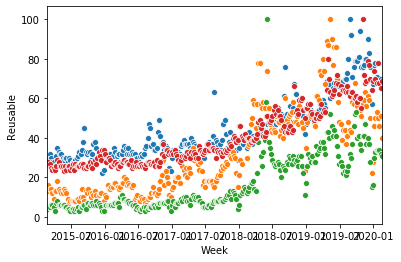

In [86]:
ax = sns.scatterplot(data= awareness_search, x="Week", y='Eco Friendly')
ax = sns.scatterplot(data= awareness_search, x="Week", y='Ocean Plastic')
ax = sns.scatterplot(data= awareness_search, x="Week", y='Plastic Pollution')
ax = sns.scatterplot(data= awareness_search, x="Week", y='Reusable')
plt.xlim(['2015-02-22 00:00:00','2020-02-16 00:00:00'])


### Linear Regression Model - "Plastic Pollution" search

In [87]:
df = awareness_search[["Week", "Plastic Pollution"]]
df["Month"] = df["Week"].dt.month
df["Year"] = df["Week"].dt.year
df = df[["Week", "Month", "Year", "Plastic Pollution"]]

X = df[["Month", "Year"]]
y = df["Plastic Pollution"]
reg = LinearRegression().fit(X, y)

/Users/mizukikadowaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mizukikadowaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
reg.predict([[2,2015]])

array([-1.45093481])

In [89]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[["Plastic Pollution"]])


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [90]:
enc.transform(df[["Plastic Pollution"]]).toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- Input: Month, Year
- Output: Plastic Pollution

In [91]:
X = df[["Month"]].to_numpy()
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[["Year"]])
X = np.append(X, enc.transform(df[["Year"]]).toarray(), axis=1)

y = df["Plastic Pollution"]
reg = LinearRegression().fit(X, y)

In [92]:
y = np.transpose(np.array(y, ndmin=2))
data = np.append(X,y,axis=1)

In [93]:
train_df, test_df = train_test_split(data, test_size=0.1)
train_df, val_df = train_test_split(train_df, test_size=(1/9))
print("Train size:{}".format(train_df.shape))
print("Validation size:{}".format(val_df.shape))
print("Test size:{}".format(test_df.shape))

Train size:(208, 8)
Validation size:(26, 8)
Test size:(27, 8)


In [94]:
reg = LinearRegression().fit(train_df[:,:-1], train_df[:,-1])

In [95]:
reg.score(val_df[:,:-1], val_df[:,-1])

0.6470665215235792

### Bottled Water popularity 

In [106]:
def lin_reg(X, Y):

    xbar = np.mean(X)
    ybar = np.mean(Y)
    n = len(X)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    m = numer / denum
    b = ybar - m * xbar

    return m, b

In [115]:
grouped_bw = bottled_water.groupby("Week").mean()
grouped_bw = grouped_bw.reset_index()
grouped_bw['Total'] = grouped_bw.mean(axis=1)
grouped_bw.head()

,Week,Aquafina,Dasani,Poland Spring,SmartWater,Total
0,2015-02-22,13,14,77,41,36.25
1,2015-03-01,14,13,67,37,32.75
2,2015-03-08,15,13,77,52,39.25
3,2015-03-15,14,12,69,43,34.50
4,2015-03-22,17,13,79,43,38.00


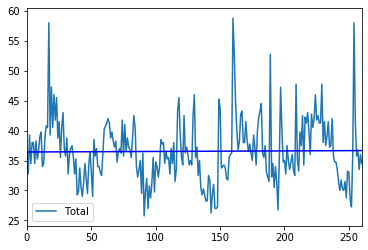

In [145]:
ax1 = grouped_bw.plot.line(y = "Total")
x = np.array(grouped_bw.index)
# x = [float(i) for i in grouped_bw.index.tolist()]
bw_m, bw_b = lin_reg(x, grouped_bw["Total"])
plt.plot(x, bw_m*x+bw_b, 'b', label='US')


### Water Bottle Popularity 

In [148]:
grouped_wb = water_bottle.groupby("Week").mean()
grouped_wb = grouped_wb.reset_index()
grouped_wb['Total'] = grouped_wb.mean(axis=1)
grouped_wb.head()

,Week,Hydro Flask,Yeti,Camelbak,Contigo,Swell,Total
0,2015-02-22,2,34,61,100,53,50.0
1,2015-03-01,2,32,72,95,55,51.2
2,2015-03-08,2,34,72,94,60,52.4
3,2015-03-15,2,36,77,97,58,54.0
4,2015-03-22,2,36,71,92,57,51.6


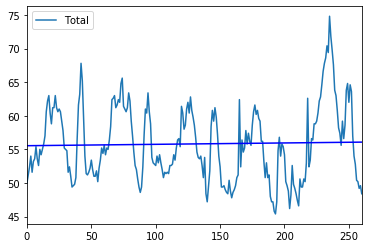

In [149]:
ax2 = grouped_wb.plot.line(y = "Total")
x = np.array(grouped_wb.index)
# x = [float(i) for i in grouped_bw.index.tolist()]
wb_m, wb_b = lin_reg(x, grouped_wb["Total"])
plt.plot(x, wb_m*x+wb_b, 'b', label='US')


### Bottled Water vs. Resuable Bottle

In [155]:
ggl_bottledwater = pd.read_csv("./data/ggl_bottledwater.csv")
ggl_reusablebottle = pd.read_csv("./data/ggl_reusable_bottle.csv")

In [156]:
ggl_bottledwater = ggl_bottledwater.drop("Week")
ggl_bottledwater = ggl_bottledwater.rename(columns = {"Category: All categories" : "Bottled Water"})
ggl_bottledwater["Bottled Water"] = ggl_bottledwater["Bottled Water"].astype(int)

ggl_reusablebottle = ggl_reusablebottle.drop("Week")
ggl_reusablebottle = ggl_reusablebottle.rename(columns = {"Category: All categories" : "Reusable Bottle"})
ggl_reusablebottle["Reusable Bottle"] = ggl_reusablebottle["Reusable Bottle"].astype(int)

In [158]:
df = pd.concat([ggl_reusablebottle, ggl_bottledwater], axis=1)
df["Week"] = pd.to_datetime(awareness_search.index)
df.head()

,Reusable Bottle,Bottled Water,Week
2015-02-22,24,16,2015-02-22
2015-03-01,23,15,2015-03-01
2015-03-08,37,16,2015-03-08
2015-03-15,36,16,2015-03-15
2015-03-22,34,15,2015-03-22


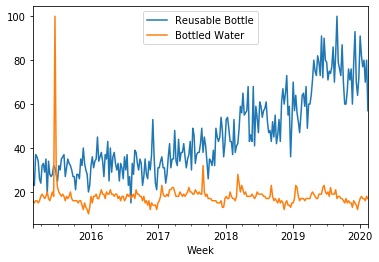

In [159]:
df.plot(x = "Week")